In [131]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
%matplotlib inline

In [132]:
def readData(path):
    """
    读取数据 
    """
    return pd.read_csv(path)


In [133]:
def linearModel(data):
    """
    线性回归统计分析步骤
    
    参数
    ----
    data: DataFrame,建模数据 
    """
    labels = ['height']
    features = ['weight']
    X = data[labels]
    X = sm.add_constant(X)
    y = data[features]
    results = trainModel(X,y)
    modelSummary(results)
    visualizeModel(labels,features,data,results)
     

In [134]:
def trainModel(X,Y):
    """
    训练模型 
    """
    model = sm.OLS(Y,X)
    results = model.fit()
    return results

In [135]:
def modelSummary(results):
    """
    分析线性回归模型的统计性质
    """
    print(results.summary())
    # 使用f test做假设检验
    # 使用f test检验x对应的系数a是否显著
    print("检验假设a==0:")
    print(results.f_test("height=0"))
    # 使用f test检验常量b是否显著
    print("检验假设const==0:")
    print(results.f_test("const=0"))
    # 使用f test同时检验a=1，const=0
    print("假设检验a==1,const==0")
    print(results.f_test(['height=1','const=0']))

In [136]:
def visualizeModel(labels,features,data,results):
    """
    模型可视化 
    """
    fig,ax = plt.subplots()
    ax.plot(data[labels],data[features],'o',label='data')
    ax.plot(data[labels],results.fittedvalues,'r--.',label='OLS')
    ax.legend(loc='best')
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     288.3
Date:                Sun, 26 Jul 2020   Prob (F-statistic):           2.01e-40
Time:                        16:47:44   Log-Likelihood:                -707.79
No. Observations:                 199   AIC:                             1420.
Df Residuals:                     197   BIC:                             1426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -130.7470     11.563    -11.308      0.0

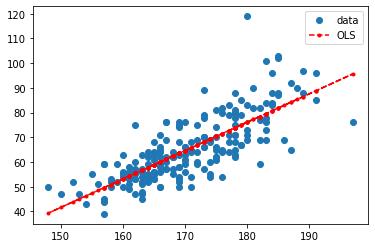

In [137]:
if __name__ == '__main__':
    data = readData('./weight.csv')
    data = data[data['height']>120]
    linearModel(data)
                    